In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 0. 데이터 로드
data : [kaggle dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

In [2]:
stroke = pd.read_csv("./healthcare-dataset-stroke-data.csv")

## 0.5 기본적인 전처리

* id는 의미가 없으므로 제거함
* 그래프를 뽑기 수월하게 하기위해 numberic data와 category data를 분리

In [3]:
stroke.drop(columns="id", inplace=True)
stroke_num = stroke[["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "stroke"]]
stroke_cat = stroke[["gender","ever_married", "work_type", "Residence_type", "smoking_status", "stroke"]]

## 1. 데이터 확인

* gender : 성별
* age : 나이
* hypertension : 고혈압의 유무
* heart disease : 심장질환의 유무
* ever married : 결혼 유무
* work type : 직장 ("children" : 아이, "Govt_jov" : 공무원, "Never_worked" : 무직, "Private" : 사적, "Self-employed" : 자영업)
* Residence_type : 거주지 (Urban : 도시, Rural : 농촌)
* avg glucose level : 평균혈당치
* bmi : bmi지수
* smoking status : 흡연유무
* stroke : 뇌졸증 유무

In [4]:
stroke.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### bmi 에 결측치가 존재하는것을 확인

In [5]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### 기초적인 데이터 정보

In [6]:
stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### 유니크한 항목 보기

In [8]:
print(stroke.ever_married.unique())
print(stroke.work_type.unique())
print(stroke.Residence_type.unique())
print(stroke.smoking_status.unique())

['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


### object 항목에 대해서 데이터 보기

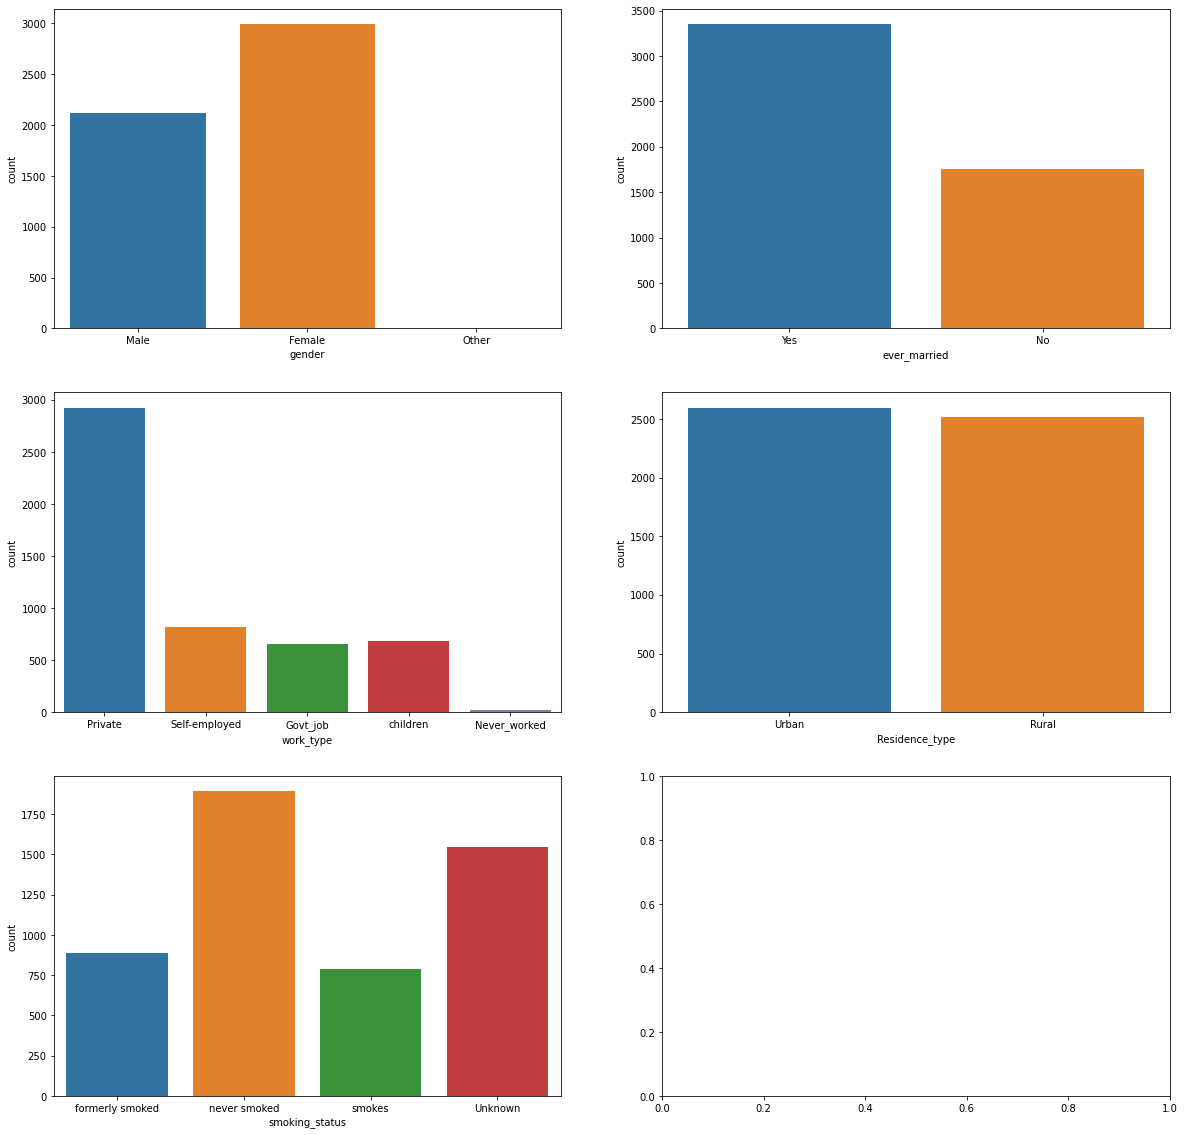

In [31]:
fig, axes = plt.subplots(3,2, figsize = (20,20))
sns.countplot(ax = axes[0,0], x = stroke_cat["gender"])
sns.countplot(ax = axes[0,1], x = stroke_cat["ever_married"])
sns.countplot(ax = axes[1,0], x = stroke_cat["work_type"])
sns.countplot(ax = axes[1,1], x = stroke_cat["Residence_type"])
sns.countplot(ax = axes[2,0], x = stroke_cat["smoking_status"])
plt.show()

## 2. 데이터 분석
### 데이터 별로 가정을 세우고 그것을 증명할만한 자료를 시각화하자.

1. age 와 stroke 의 상관관계

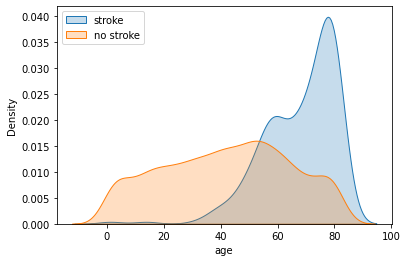

In [32]:
sns.kdeplot(data = stroke[stroke.stroke == 1], x = "age", fill = True)
sns.kdeplot(data = stroke[stroke.stroke == 0], x = "age", fill = True)
plt.legend(["stroke", "no stroke"], loc = "upper left")
plt.show()

### 분석결과 : 나이가 높을수록 뇌졸증의 경향을 보임

2. avg_glucose_level과 stroke의 상관관계

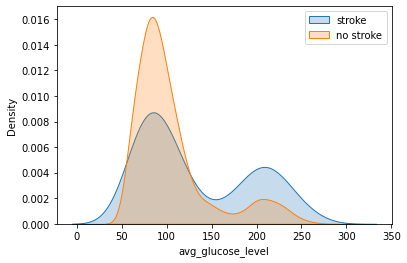

In [34]:
sns.kdeplot(data = stroke[stroke.stroke == 1], x = "avg_glucose_level", fill = True)
sns.kdeplot(data = stroke[stroke.stroke == 0], x = "avg_glucose_level", fill = True)
plt.legend(["stroke", "no stroke"])
plt.show()

### 분석결과 : 특별한 상관관계가 보이지는 않지만, stroke의 경우가 평균이 조금 더 높은것을 알 수 있다.